# <center> Assignment: Advanced Regression

## Problem Statement 

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.



### Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Importing and analysing data

In [1]:
# importing all required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, r2_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the data set
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
# information regarding the entire data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Finding the missing values

In [5]:
# percentage of missing varialbles

mis_per = list((df.isnull().sum()/(df.count()[0]))*100)
mis_per = sorted(list(zip(df.columns,mis_per)), key= lambda x: x[1], reverse=True)
# mis_per.sort(reverse=True)
mis_per[:10]

[('PoolQC', 99.52054794520548),
 ('MiscFeature', 96.30136986301369),
 ('Alley', 93.76712328767123),
 ('Fence', 80.75342465753424),
 ('FireplaceQu', 47.26027397260274),
 ('LotFrontage', 17.73972602739726),
 ('GarageType', 5.5479452054794525),
 ('GarageYrBlt', 5.5479452054794525),
 ('GarageFinish', 5.5479452054794525),
 ('GarageQual', 5.5479452054794525)]

In [6]:
# These variables have high missign values so we can drop them

df.drop(["Alley","PoolQC","Fence","MiscFeature"],axis=1, inplace = True)

## Impute all  the other missing values.

In [7]:
# we will impute the values using mode

df.LotFrontage = df.LotFrontage.fillna(df.LotFrontage.median())

In [8]:
df.MasVnrType = df.MasVnrType.fillna("None")

In [9]:
df.MasVnrArea = df.MasVnrArea.fillna(0)

In [10]:
# filling all these null values with none
df[["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]] = df[["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]].fillna("None")

In [11]:
lst = ["GarageType","FireplaceQu","GarageFinish","GarageQual","GarageCond"]
df[lst] = df[lst].fillna("No")

In [12]:
df.GarageYrBlt = df.GarageYrBlt.fillna(df.GarageYrBlt.mode()[0])

In [13]:
df.GarageYrBlt.isnull().sum()

0

In [14]:
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df.drop(['YearBuilt', 'YrSold'], axis=1, inplace = True)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearRemo

<AxesSubplot:>

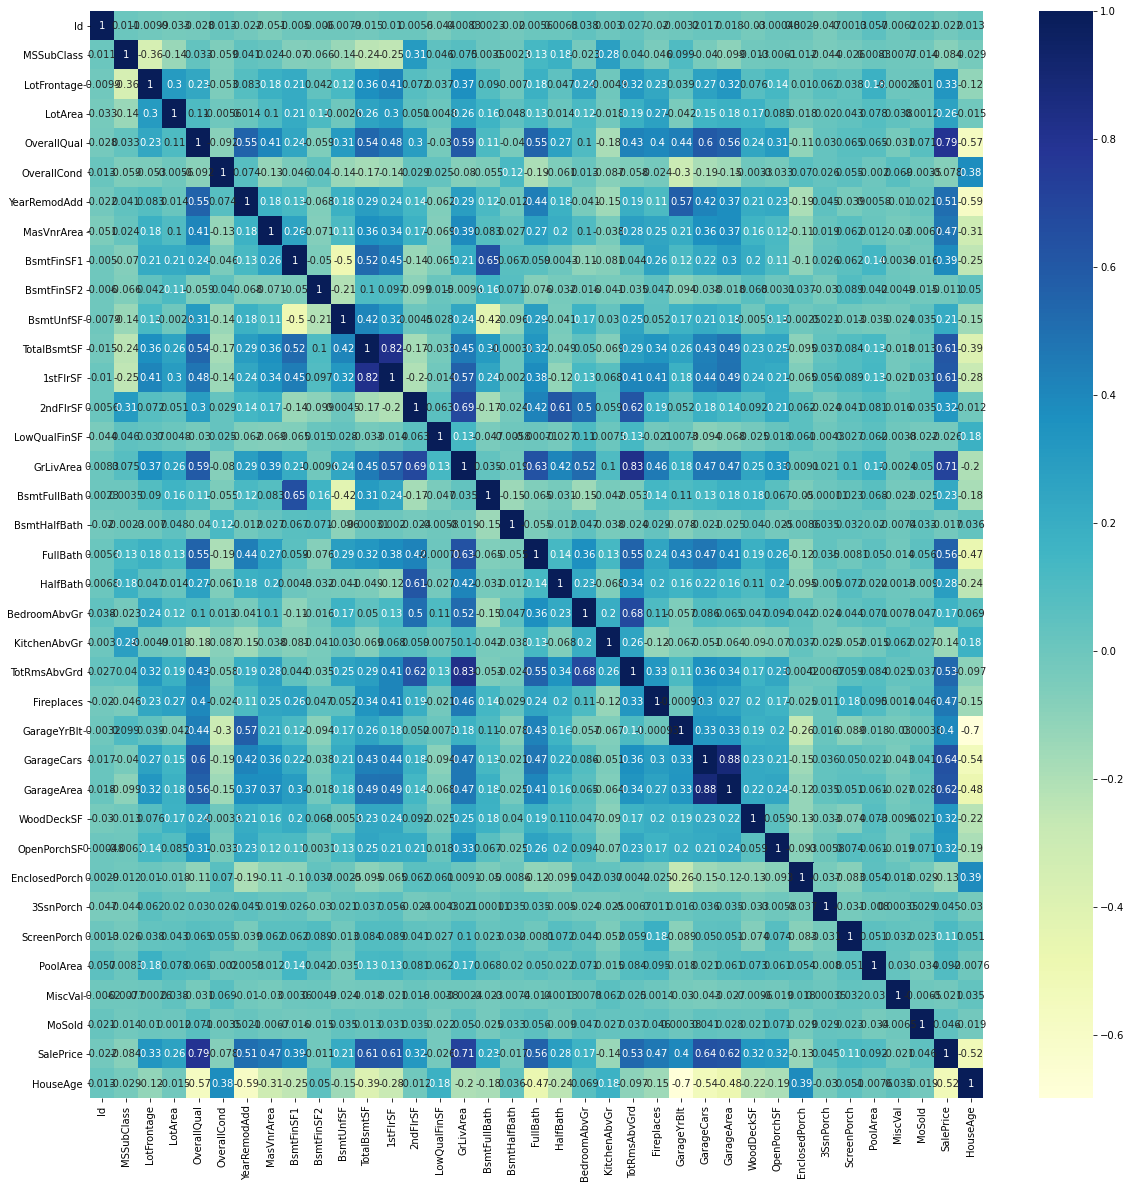

In [16]:
# Visualising the corrilation btween variables
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

We can find corrilation between several varialbes in the data. we need to eliminate them.

## Creating Dunmmy variables for the categorial variables

In [17]:
# Creating dummies for all the object variables
obj_var = list(df.select_dtypes(include=["object"]).columns)

In [18]:
dummies =  pd.get_dummies(df[obj_var], drop_first=True)

In [19]:
dummies

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1456,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1457,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1458,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [20]:
# adding both the dummies and droping them from the actual dataframe


df = df.drop(obj_var, axis=1)
rem_col = list(df.columns)

In [21]:
# Concatinating all the dataframes to get the actual dataframe to work on
df = pd.concat([df,dummies], axis=1)

In [22]:
df.drop("Id",axis=1, inplace=True)

<br><br><br>

## Handiling the outliers

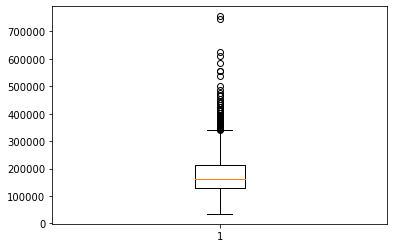

In [23]:
plt.boxplot(df.SalePrice)
plt.show()

In [24]:
# calculating the percentage of outliers
(df.SalePrice[df.SalePrice>340000].count()/df.SalePrice.count())*100

4.178082191780822

In [25]:
# droppping the rows with outliers
df = df[~(df.SalePrice>340000)]

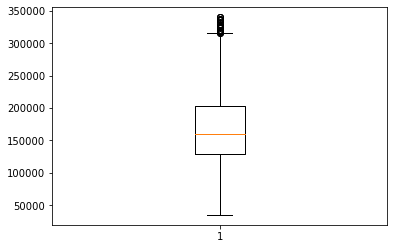

In [26]:
# No more outliers
plt.boxplot(df.SalePrice)
plt.show()

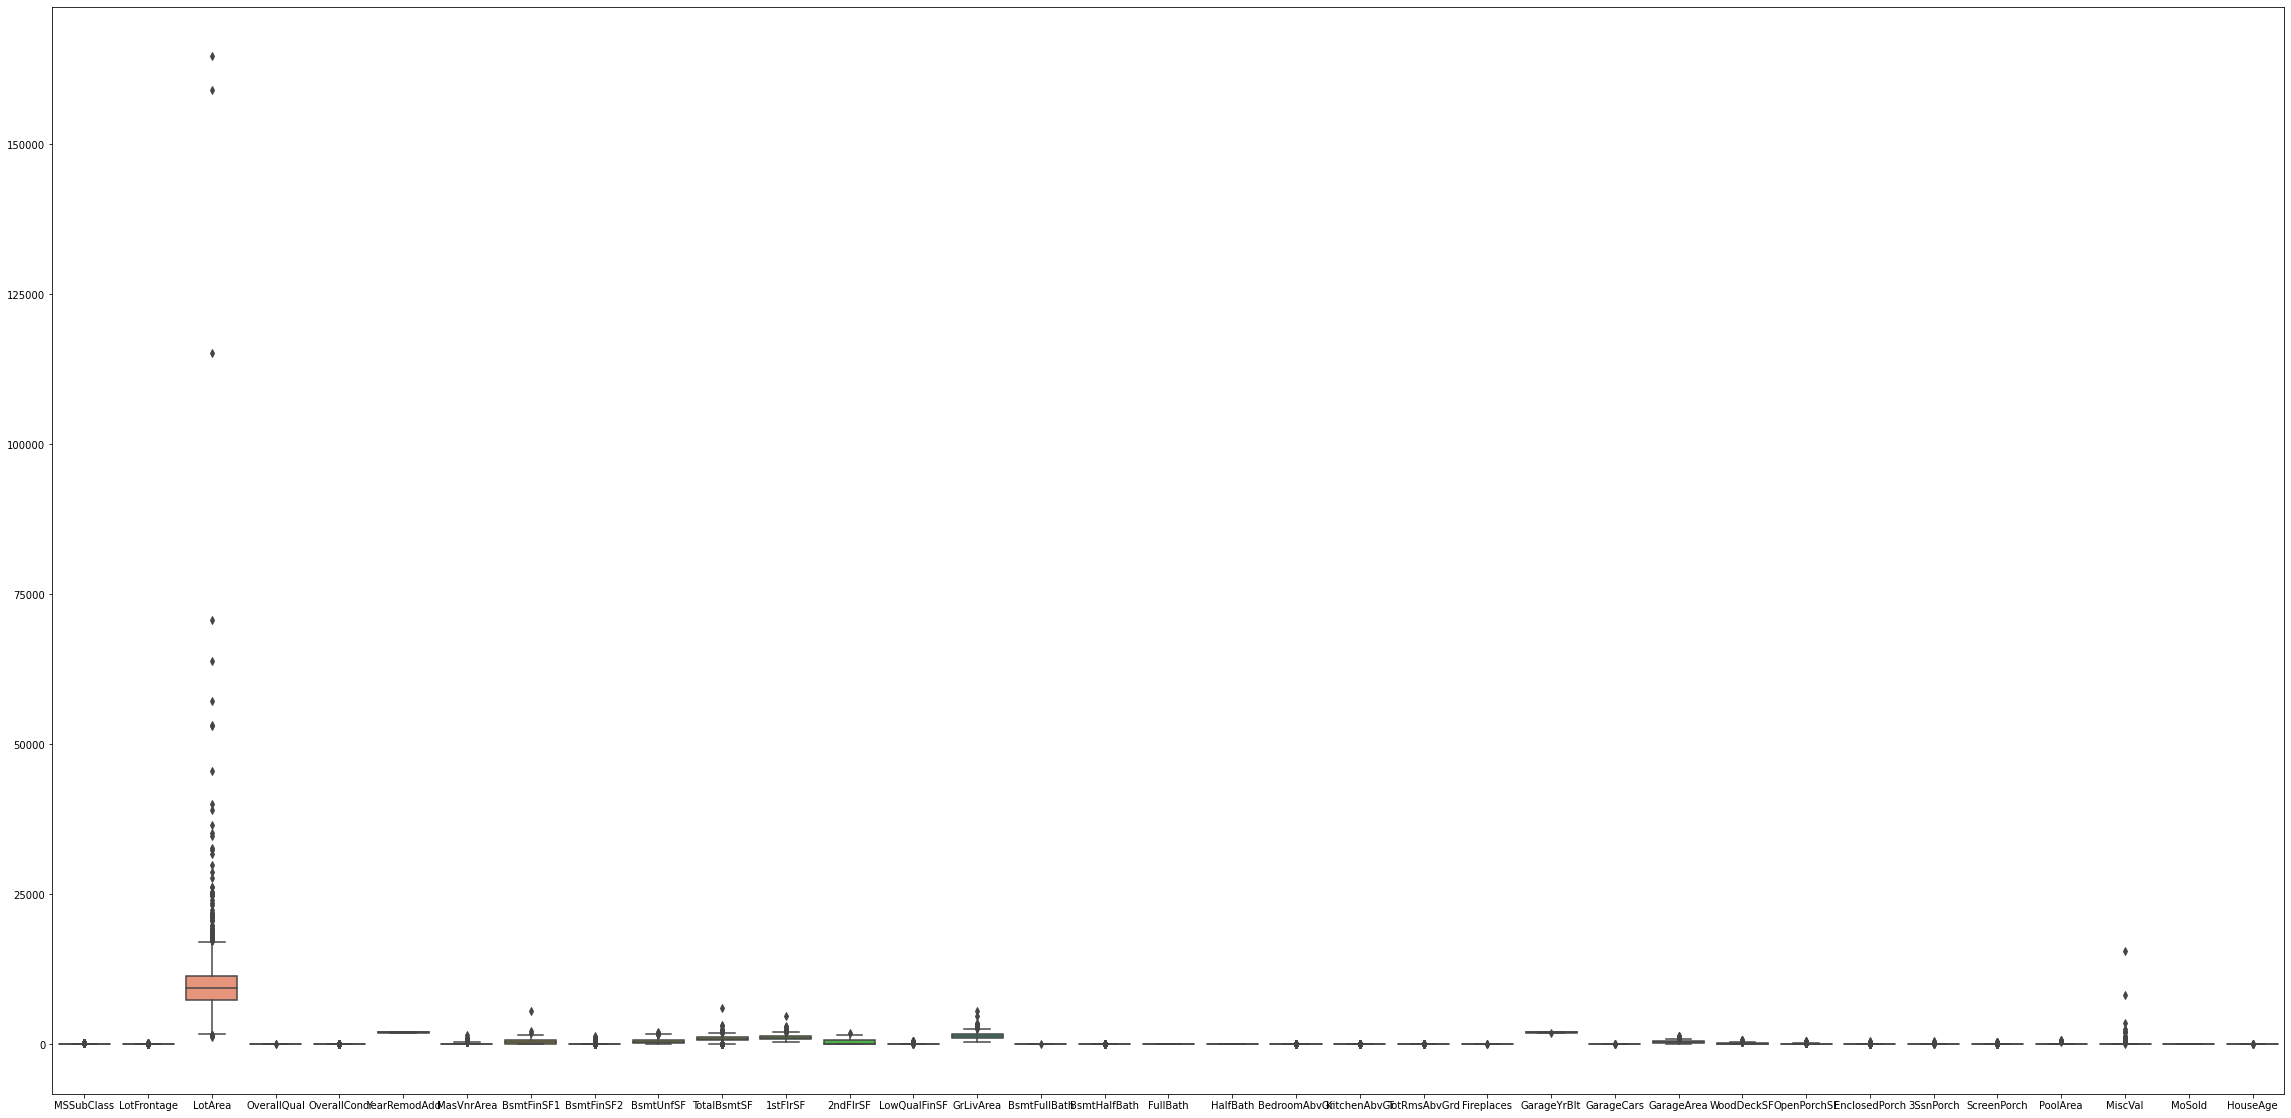

In [27]:
# checking of the other features
rem_col.remove('SalePrice')
rem_col.remove('Id')
plt.figure(figsize=(40,20))
sns.boxplot(data=df[rem_col])
plt.show()

In [28]:
df[rem_col].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,HouseAge
count,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,...,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000
mean,57.487491,69.047891,10155.280915,5.983560,5.591137,1984.058613,89.725518,417.333095,47.478914,559.461758,...,458.817012,89.621158,44.892066,22.378127,3.231594,14.634024,2.482487,45.385275,6.312366,37.739099
std,42.803603,21.522816,8324.834198,1.282272,1.118236,20.661160,159.219858,428.401771,162.648530,429.378909,...,204.278673,121.798431,65.718951,61.454480,28.563071,54.752105,38.289681,506.746349,2.703584,30.059547
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,20.000000,60.000000,7442.000000,5.000000,5.000000,1966.000000,0.000000,0.000000,0.000000,218.000000,...,312.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,9.000000
50%,50.000000,69.000000,9317.000000,6.000000,5.000000,1992.000000,0.000000,370.000000,0.000000,476.000000,...,471.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,36.000000
75%,70.000000,78.000000,11316.500000,7.000000,6.000000,2003.000000,143.000000,686.000000,0.000000,807.000000,...,573.000000,165.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,56.000000
max,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,1600.000000,5644.000000,1474.000000,2042.000000,...,1418.000000,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,136.000000


In [29]:
mx = df[rem_col][df.LotArea<20000].LotArea.max()

In [30]:
df.LotArea = df.LotArea.apply(lambda x : mx if x>20000 else x)

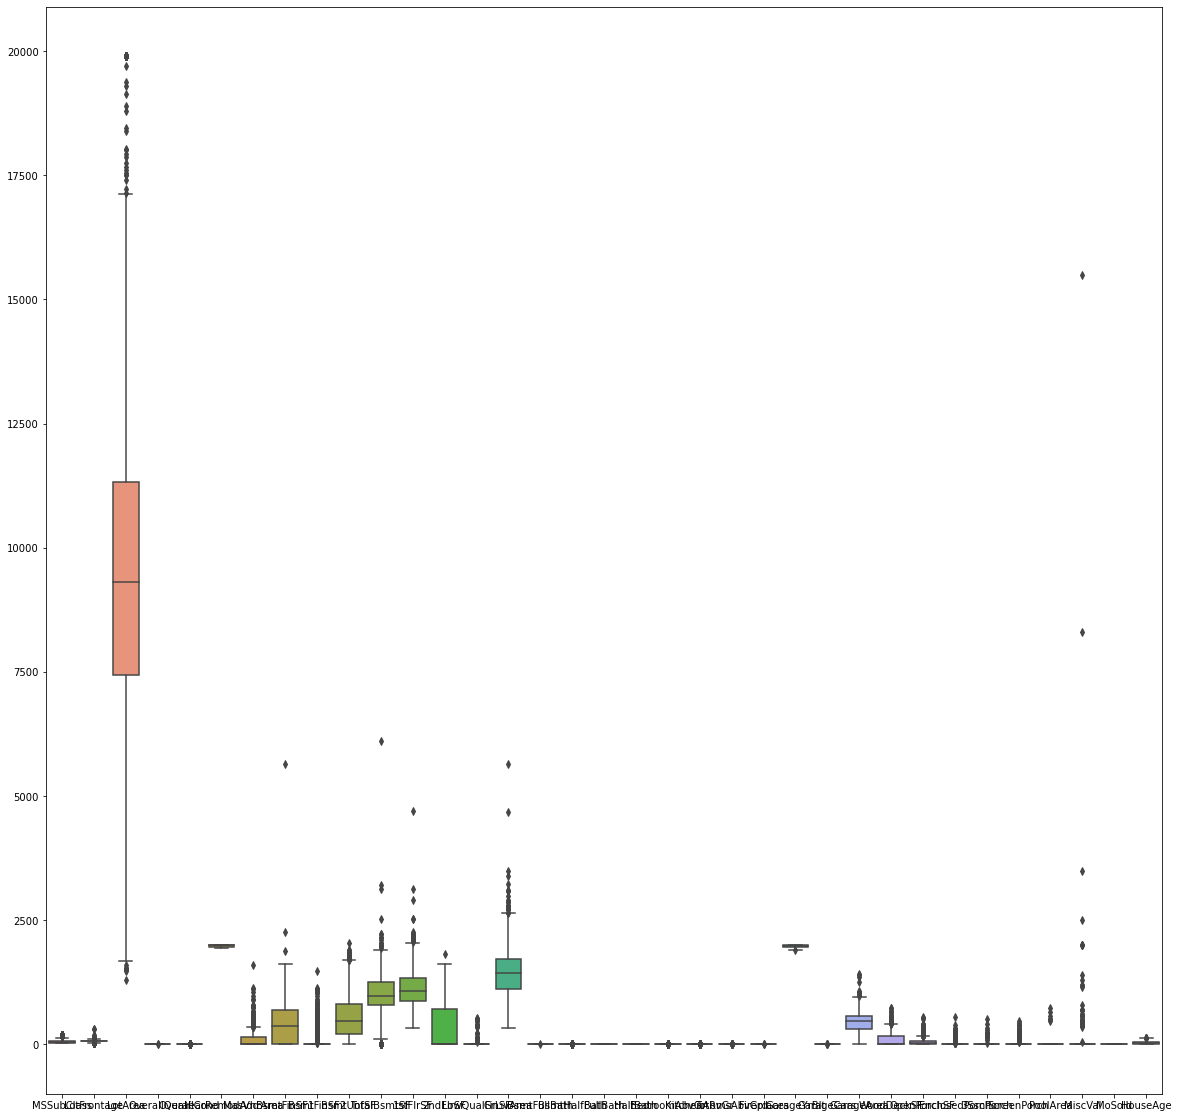

In [31]:
plt.figure(figsize=(20,20))
sns.boxplot(data=df[rem_col])
plt.show()

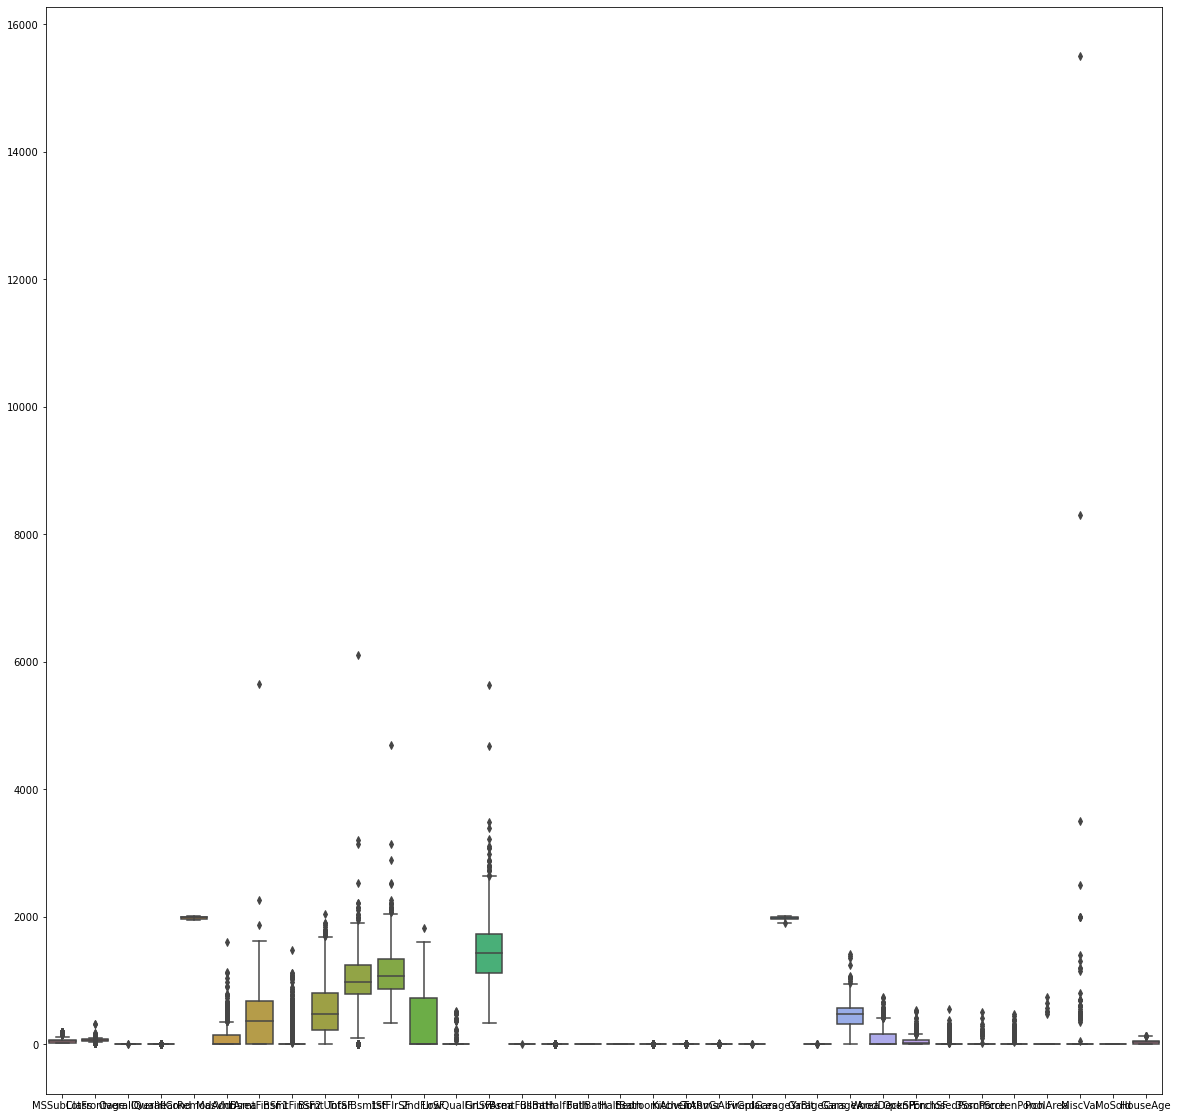

In [32]:
rem_col.remove('LotArea')
plt.figure(figsize=(20,20))
sns.boxplot(data=df[rem_col])
plt.show()

In [33]:
mx = df.MiscVal[df.MiscVal<2000].max()

In [34]:
df.MiscVal = df.MiscVal.apply( lambda x: mx if x>2000 else x )

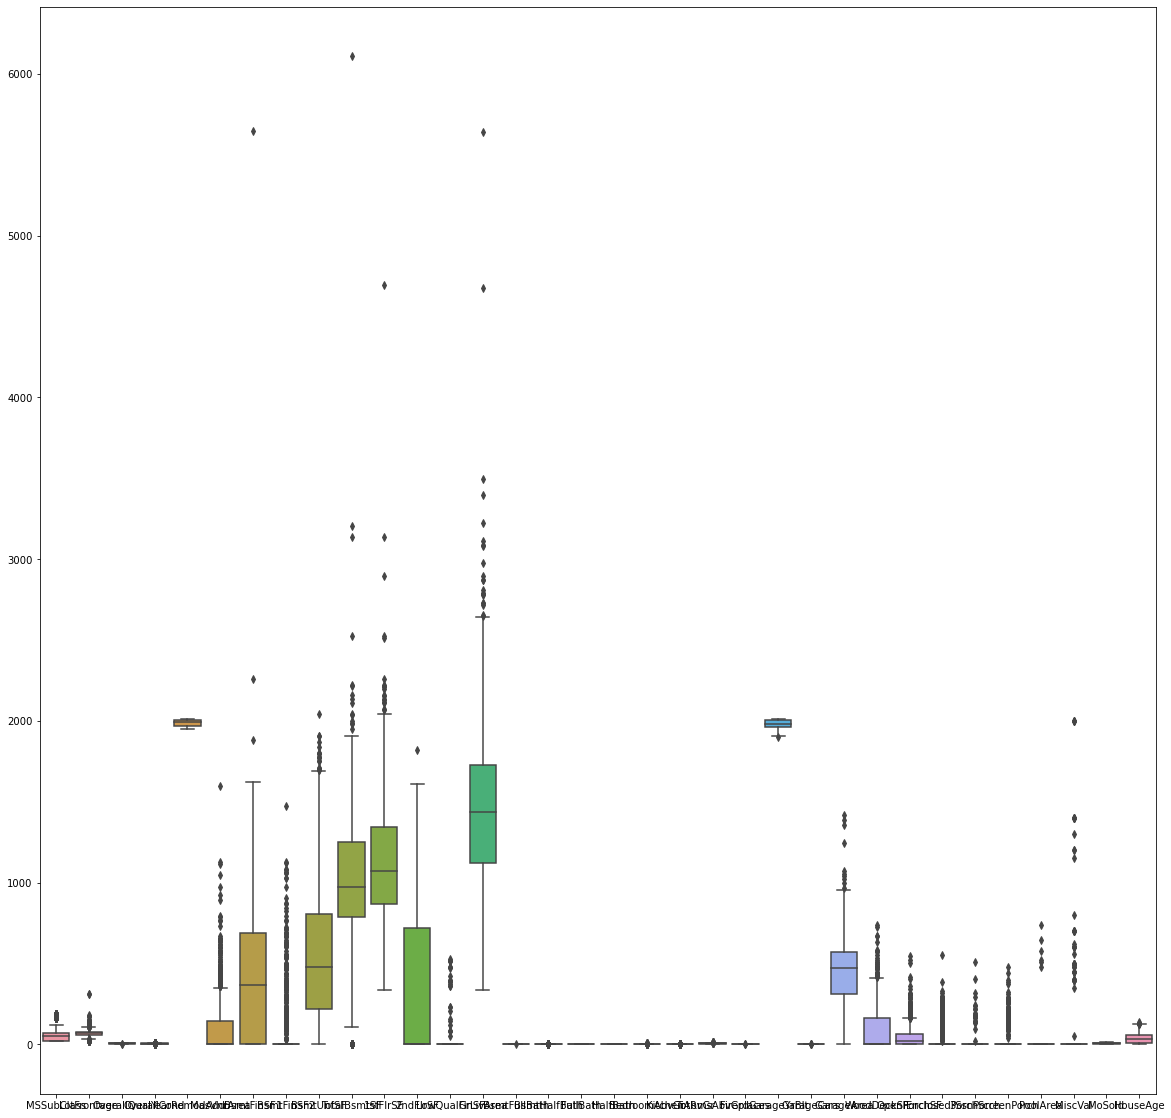

In [35]:
plt.figure(figsize=(20,20))
sns.boxplot(data=df[rem_col])
plt.show()

In [36]:
out_var = ['BsmtFinSF1','TotalBsmtSF', '1stFlrSF', 'GrLivArea']

In [37]:
for i in out_var:
    mx= df[df[i]<3000][i].max()
    df[i] = df[i].apply( lambda x: mx if x>3000 else x )

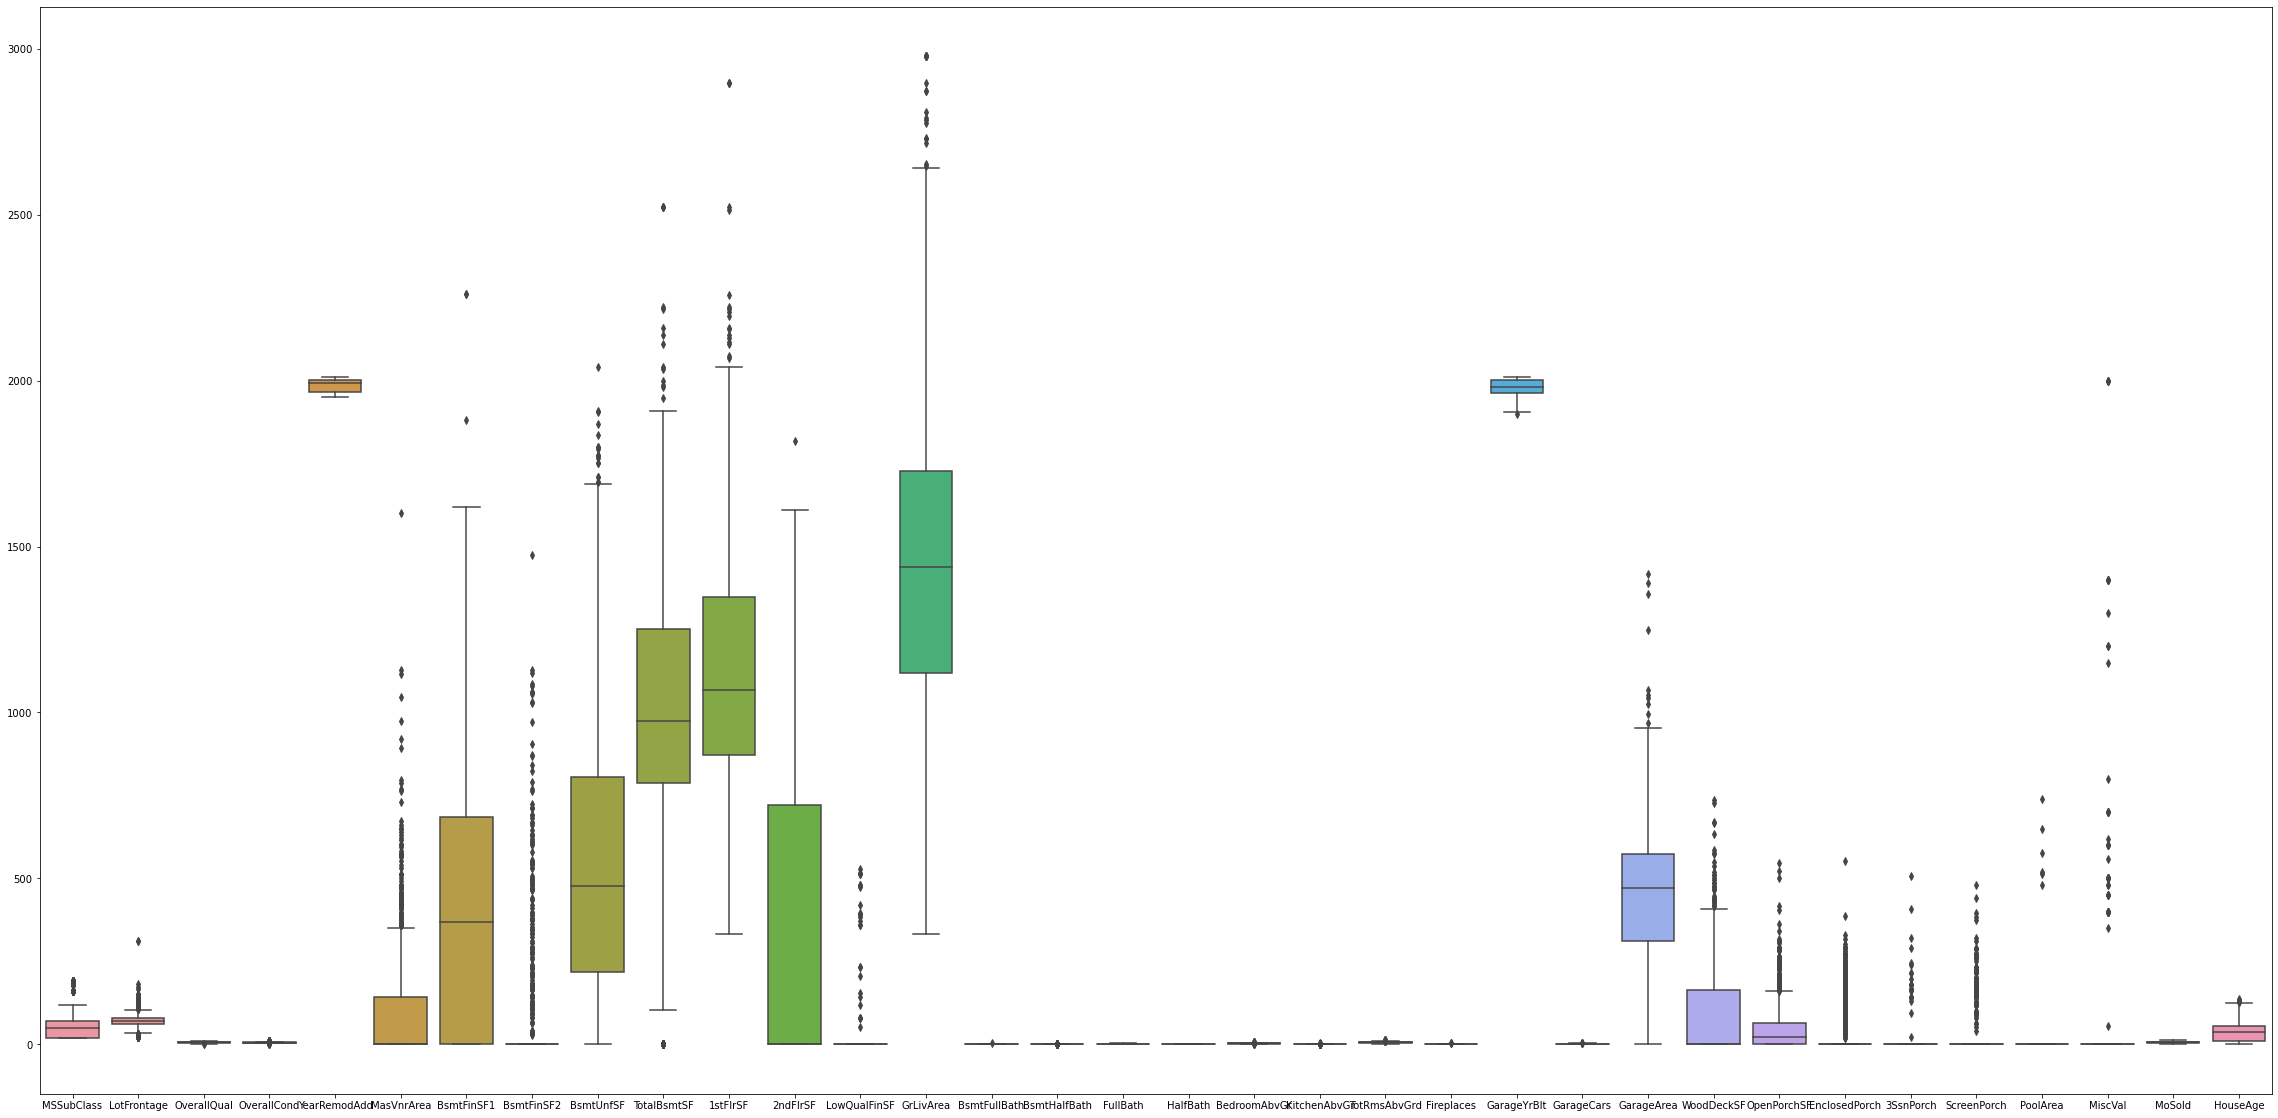

In [38]:
plt.figure(figsize=(40,20))
sns.boxplot(data=df[rem_col])
plt.show()

<br><br><br><br>

## Splitting the data

In [39]:
df_train,df_test = train_test_split(df, train_size = 0.7, test_size=0.3, random_state = 100)

In [40]:
df_train.shape, df_test.shape

((979, 246), (420, 246))

In [41]:
y_train = df_train.pop("SalePrice")
X_train = df_train

In [42]:
y_test = df_test.pop("SalePrice")
X_test = df_test

<br><br><br><br>







## Feature scaling

In [43]:
scaler = StandardScaler()

 
X_train[rem_col] = scaler.fit_transform(X_train[rem_col])
X_test[rem_col] = scaler.transform(X_test[rem_col])

In [44]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
162,-0.873371,1.270802,12182,0.808376,-0.546419,1.014982,0.902215,2.003778,-0.294909,-0.512800,...,0,0,1,0,0,0,0,0,0,1
743,0.503489,0.074997,12886,-0.719424,0.342192,0.726335,-0.552403,0.109179,-0.294909,-1.130587,...,0,0,0,0,1,0,0,0,1,0
1271,-0.873371,0.027165,9156,0.044476,1.230803,-0.765008,-0.552403,-1.002053,-0.294909,2.175976,...,0,0,0,0,1,0,0,0,1,0
1110,0.044536,0.027165,8000,0.044476,-0.546419,0.582011,-0.552403,-0.453945,-0.294909,-0.012018,...,0,0,0,0,1,0,0,0,1,0
344,2.339302,-1.551296,2592,-0.719424,-2.323640,-0.380145,-0.552403,-0.679195,1.115211,-0.898917,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,0.044536,0.314158,9317,0.808376,-0.546419,0.437688,0.329379,0.281870,-0.294909,-0.777231,...,0,0,0,0,1,0,0,0,1,0
55,-0.873371,1.509962,10175,0.044476,-0.546419,-0.957439,1.198287,0.224306,-0.294909,0.879560,...,0,0,0,0,1,0,0,0,1,0
367,0.503489,1.557795,9150,0.044476,-0.546419,-1.053655,1.410687,-0.073524,-0.294909,0.395159,...,0,0,0,0,1,0,0,0,1,0
82,-0.873371,0.457655,10206,1.572277,-0.546419,1.111197,2.459814,-0.919461,-0.294909,2.271920,...,0,0,0,0,1,0,0,0,1,0


In [45]:
X_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
138,0.044536,0.218494,9066,1.572277,-0.546419,0.774443,1.507233,0.669800,-0.294909,-0.522160,...,0,0,0,0,1,0,0,0,1,0
212,0.044536,0.170662,8640,0.808376,-0.546419,1.207413,-0.552403,1.055227,-0.294909,-1.125906,...,0,0,1,0,0,0,0,0,0,1
1187,-0.873371,0.983809,12461,1.572277,-0.546419,0.533903,-0.552403,2.641986,-0.294909,-0.915297,...,0,0,0,0,1,0,0,0,1,0
1006,-0.873371,0.027165,12155,0.044476,-2.323640,-0.668792,-0.552403,2.093878,-0.294909,-0.325592,...,0,0,0,0,1,0,0,0,1,0
886,0.732966,0.074997,8393,-0.719424,-0.546419,1.014982,0.232833,0.319412,-0.294909,1.260996,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,0.274012,1.318634,13132,-0.719424,-0.546419,-1.630949,-0.552403,-1.002053,-0.294909,0.439621,...,0,0,0,0,1,0,0,0,1,0
780,-0.873371,-0.259828,7875,0.808376,-0.546419,0.582011,-0.307821,-1.002053,-0.294909,1.586270,...,0,0,0,0,1,0,0,0,1,0
25,-0.873371,1.988284,14230,1.572277,-0.546419,1.111197,3.566868,-1.002053,-0.294909,2.356164,...,0,0,0,0,1,0,0,0,1,0
420,0.732966,0.457655,7060,0.808376,-0.546419,0.678227,0.734869,2.274078,-0.294909,-1.226531,...,0,0,0,0,1,0,1,0,0,0


<br><br><br>

# Building models using Ridge and Lasso

## Ridge Model

In [71]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,  50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:   11.1s finished


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [72]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=20]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.025665,0.011059,0.006864,0.002317,0.0001,{'alpha': 0.0001},0.876104,0.524379,0.913864,0.911937,...,0.945221,0.945478,0.946383,0.945990,0.946942,0.951525,0.948890,0.950252,0.947676,0.001978
1,0.022289,0.001840,0.007563,0.002158,0.001,{'alpha': 0.001},0.876697,0.530591,0.914055,0.912089,...,0.945211,0.945468,0.946377,0.945982,0.946917,0.951515,0.948883,0.950247,0.947667,0.001979
2,0.023571,0.003342,0.006993,0.001740,0.01,{'alpha': 0.01},0.876654,0.579812,0.915117,0.912012,...,0.944757,0.945042,0.946042,0.945579,0.946726,0.951031,0.948555,0.949967,0.947336,0.001990
3,0.020537,0.001549,0.006059,0.002112,0.05,{'alpha': 0.05},0.870603,0.675604,0.915772,0.909637,...,0.943051,0.943564,0.944668,0.944082,0.946519,0.949345,0.947191,0.948680,0.946128,0.002065
4,0.024600,0.003319,0.006297,0.002168,0.1,{'alpha': 0.1},0.868945,0.716390,0.915474,0.908805,...,0.942165,0.942805,0.943875,0.943297,0.946261,0.948479,0.946384,0.947908,0.945435,0.002113


In [73]:
model_cv.best_params_ , model_cv.best_score_

({'alpha': 0.8}, 0.8739727990655466)

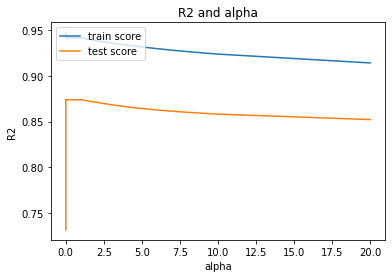

In [74]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')
plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [75]:
alpha = 0.8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)


Ridge(alpha=0.8)

In [76]:
y_train_pred = ridge.predict(X_train)
print("Train score: ",r2_score(y_train, y_train_pred))

y_test_pred = ridge.predict(X_test)
print("Test score: ", r2_score(y_test, y_test_pred))

Train score:  0.9401579256743409
Test score:  0.8692010329851947


In [77]:
# Lets get the top features of the best model we just built.
coefs = list(zip(X_train.columns,ridge.coef_))
coefs[:5]

[('MSSubClass', -2085.7532650525477),
 ('LotFrontage', -1391.5251843115548),
 ('LotArea', 1.9031688008284),
 ('OverallQual', 8403.49978545529),
 ('OverallCond', 5065.907425585444)]

In [78]:
# lets sort the the features 
ridge_coef = pd.DataFrame(sorted(coefs, key= lambda x: x[1],reverse=True), columns=["Features","Coef"])
ridge_coef.head(10)

,Features,Coef
0,GrLivArea,68611.667220
1,Condition2_PosA,24093.480113
2,TotalBsmtSF,23835.231555
3,Street_Pave,19123.921885
4,SaleType_Con,18846.172083
5,Neighborhood_NoRidge,18505.793062
6,SaleType_CWD,18477.392274
7,RoofMatl_CompShg,18162.903593
8,RoofMatl_Tar&Grv,17641.294983
9,Neighborhood_NridgHt,16741.089207


<br><br><br><br>

## Lasso Model

In [79]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:  2.7min finished


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [80]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.638007,0.074689,0.008000,0.002464,0.0001,{'alpha': 0.0001},0.878992,0.511428,0.914840,0.910270,...,0.945054,0.945341,0.946271,0.945890,0.946936,0.951304,0.948761,0.950144,0.947568,0.001964
1,0.592215,0.082202,0.007584,0.001718,0.001,{'alpha': 0.001},0.879007,0.511874,0.914836,0.910273,...,0.945054,0.945341,0.946271,0.945890,0.946936,0.951304,0.948761,0.950144,0.947568,0.001964
2,0.600566,0.094399,0.007111,0.001393,0.01,{'alpha': 0.01},0.879152,0.516319,0.914796,0.910296,...,0.945053,0.945341,0.946271,0.945889,0.946936,0.951303,0.948760,0.950144,0.947567,0.001964
3,0.601036,0.043496,0.007619,0.001986,0.05,{'alpha': 0.05},0.879747,0.523828,0.914651,0.910387,...,0.945049,0.945337,0.946268,0.945886,0.946935,0.951298,0.948757,0.950140,0.947564,0.001964
4,0.631557,0.139185,0.007439,0.001827,0.1,{'alpha': 0.1},0.880210,0.524809,0.914656,0.910498,...,0.945044,0.945332,0.946263,0.945882,0.946934,0.951292,0.948752,0.950136,0.947560,0.001964


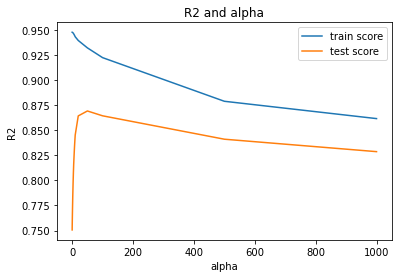

In [81]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [82]:
model_cv.best_estimator_, model_cv.best_score_

(Lasso(alpha=50), 0.8691467815444801)

In [83]:
alpha =50

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=50)

In [84]:
y_train_pred_lasso = lasso.predict(X_train)
print("Train score: ", r2_score(y_train, y_train_pred_lasso))

y_test_pred_lasso = lasso.predict(X_test)
print("Test score: ", r2_score(y_test, y_test_pred_lasso))

Train score:  0.9297878041767018
Test score:  0.881333321591137


In [85]:
coefs = list(zip(X_train.columns,lasso.coef_))
coefs[:5]

[('MSSubClass', -3484.7377521900735),
 ('LotFrontage', -1442.1683862502837),
 ('LotArea', 1.8143406200796441),
 ('OverallQual', 9338.085057209677),
 ('OverallCond', 5893.51245119262)]

In [86]:
# lets sort the the features 
lasso_coef = pd.DataFrame(sorted(coefs, key= lambda x: x[1],reverse=True), columns=["Features","Coef"])
lasso_coef.head(10)

,Features,Coef
0,GrLivArea,79142.298332
1,Neighborhood_NoRidge,20620.852631
2,Neighborhood_NridgHt,18379.052745
3,Exterior1st_BrkFace,14599.817518
4,Functional_Typ,13522.076069
5,Neighborhood_Somerst,13518.933497
6,Neighborhood_Crawfor,12306.443413
7,TotalBsmtSF,11413.258494
8,OverallQual,9338.085057
9,Street_Pave,8853.245707


<br><br><br><br>

## Assignment Questions



### Question 1:
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?


#### Ridge ()

In [88]:
alpha = 0.8*2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)


Ridge(alpha=1.6)

In [89]:
y_train_pred = ridge.predict(X_train)
print("Train score: ",r2_score(y_train, y_train_pred))

y_test_pred = ridge.predict(X_test)
print("Test score: ", r2_score(y_test, y_test_pred))

Train score:  0.9378987769626825
Test score:  0.8709857151847396


In [90]:
coefs = list(zip(X_train.columns,ridge.coef_))
coefs[:5]

[('MSSubClass', -2711.163887527553),
 ('LotFrontage', -1663.3146730774606),
 ('LotArea', 1.8732077165817642),
 ('OverallQual', 8646.671086828834),
 ('OverallCond', 5145.23158600108)]

In [91]:
# lets sort the the features 
ridge_coef = pd.DataFrame(sorted(coefs, key= lambda x: x[1],reverse=True), columns=["Features","Coef"])
ridge_coef.head(10)

,Features,Coef
0,GrLivArea,61729.748408
1,TotalBsmtSF,21115.792101
2,Neighborhood_NoRidge,18341.367300
3,Neighborhood_NridgHt,17500.371210
4,Condition2_PosA,16996.960194
5,Street_Pave,15572.697741
6,SaleType_CWD,15293.439214
7,SaleType_Con,14209.135200
8,Functional_Typ,13998.125600
9,MSZoning_FV,12585.067148


### Lasso()

In [93]:
alpha =50*2

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [94]:
y_train_pred_lasso = lasso.predict(X_train)
print("Train score: ", r2_score(y_train, y_train_pred_lasso))

y_test_pred_lasso = lasso.predict(X_test)
print("Test score: ", r2_score(y_test, y_test_pred_lasso))

Train score:  0.9206450519267309
Test score:  0.8770750819348347


In [95]:
coefs = list(zip(X_train.columns,lasso.coef_))
coefs[:5]

[('MSSubClass', -3262.0138205489707),
 ('LotFrontage', -1745.8611851227329),
 ('LotArea', 1.7557197089667866),
 ('OverallQual', 10312.727875089611),
 ('OverallCond', 6159.039122928093)]

In [96]:
# lets sort the the features 
lasso_coef = pd.DataFrame(sorted(coefs, key= lambda x: x[1],reverse=True), columns=["Features","Coef"])
lasso_coef.head(10)

,Features,Coef
0,GrLivArea,66219.755807
1,Neighborhood_NridgHt,18467.925583
2,Neighborhood_Somerst,16920.157223
3,Neighborhood_NoRidge,16502.030446
4,Exterior1st_BrkFace,13745.240347
5,Functional_Typ,12225.573936
6,Neighborhood_Crawfor,11300.576352
7,OverallQual,10312.727875
8,TotalBsmtSF,10240.383440
9,Condition1_Norm,7434.599388
